In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline
import os

In [2]:
os.chdir(r'd:\ml\–≤—Ä–µ–º–µ–Ω–Ω—ã–µ —Ä—è–¥—ã\Series')
# –æ—Å—Ç–∞–≤–ª—è–µ–º –¥–≤–∞ —Ä—è–¥–∞ - —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–π
female_births = pd.read_csv("daily-total-female-births-in-cal.csv")
# –Ω–µ—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–π
airlines_passengers = pd.read_csv("international-airline-passengers.csv")

In [3]:
all_series = {
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Daily total female births in California": female_births["Count"]
}

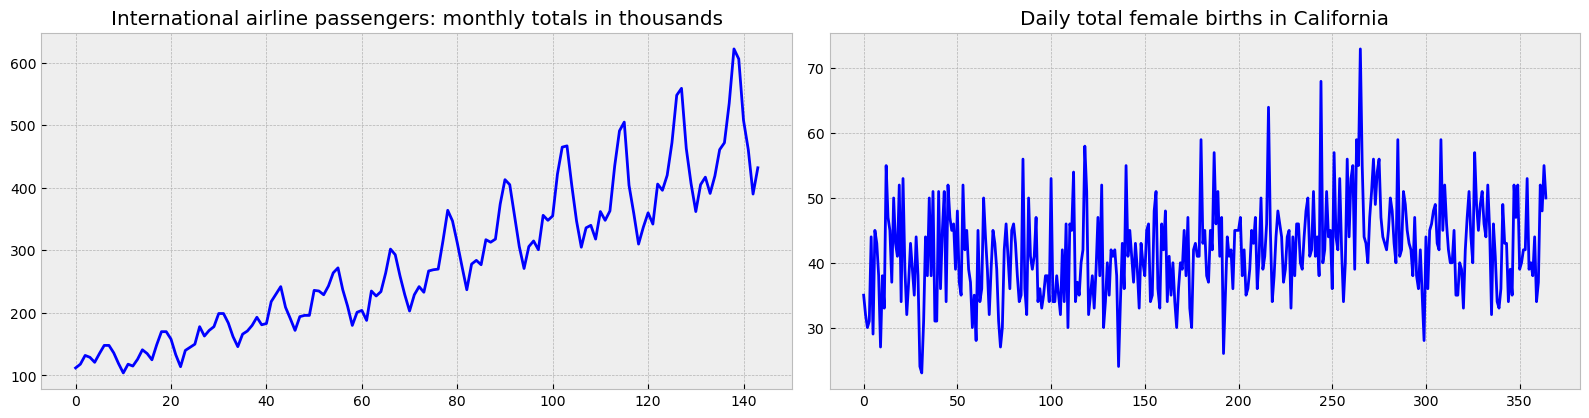

In [4]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (2, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

In [5]:
def plot_ts_and_points(tser, start_point, step):
    new_series = [None for i in range(len(tser))]
    for i in range(len(tser)):
        pos = start_point + step * i
        if pos >= len(tser):
            break
        new_series[pos] = tser[pos]
    new_series = pd.Series(new_series)
    
    with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        ts_ax = plt.axes()
        tser.plot(ax=ts_ax, color='blue')
        new_series.plot(ax=ts_ax, style='ro')

In [6]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh', tsname ='Original'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title(tsname)

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

In [7]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

# –°–∫–æ–ª—å–∑—è—â–µ–µ —Å—Ä–µ–¥–Ω–µ–µ –Ω–∞ –Ω–µ—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ–º —Ä—è–¥–µ

In [8]:
def moving_average(series, n):
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    return series.rolling(n).mean()

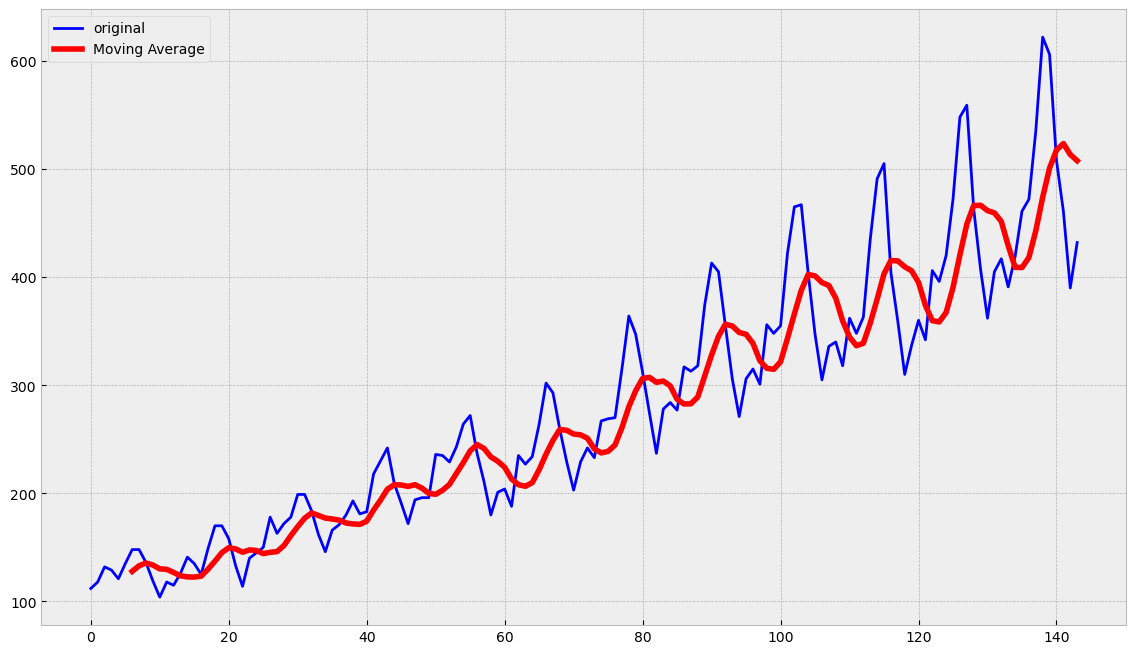

In [9]:
ts = pd.read_csv("international-airline-passengers.csv")['Count']
ser = moving_average(ts, 7)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(ts, color='blue',label='original')
    plt.plot(ser, color='red', linewidth='4', label='Moving Average')
    plt.legend()

# –°–∫–æ–ª—å–∑—è—â–µ–µ —Å—Ä–µ–¥–Ω–µ–µ –Ω–∞ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ–º —Ä—è–¥–µ

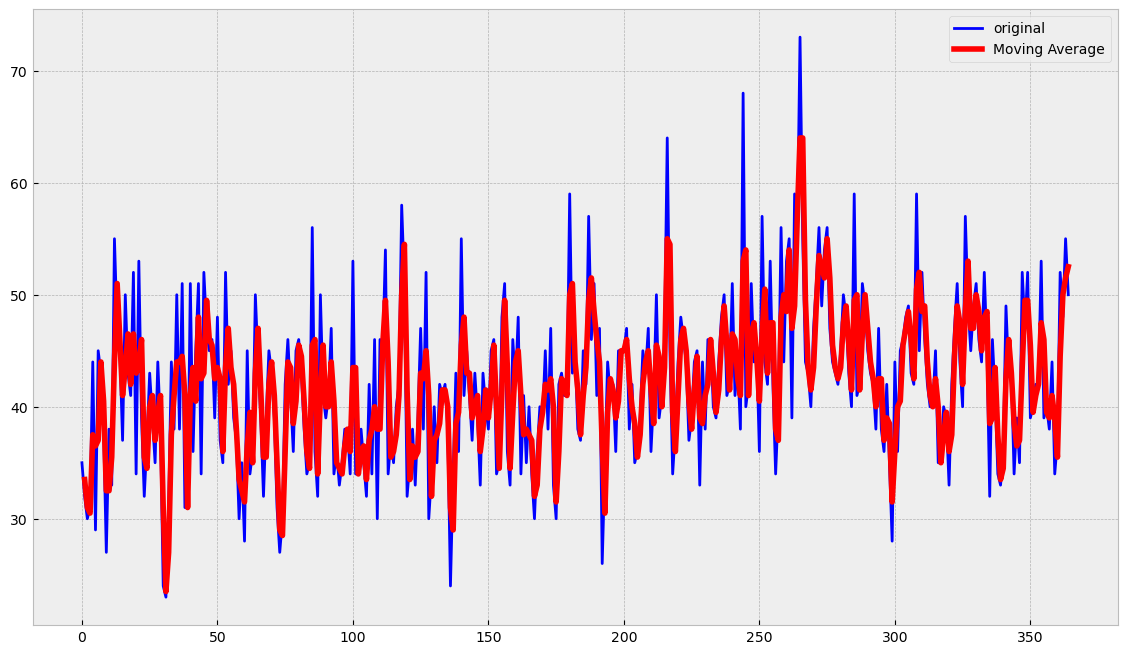

In [10]:
ts = pd.read_csv("daily-total-female-births-in-cal.csv")['Count']
ser = moving_average(ts, 2)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(ts, color='blue',label='original')
    plt.plot(ser, color='red', linewidth='4', label='Moving Average')
    plt.legend()

–ü–æ —Å—É—Ç–∏ MA —Å–≥–ª–∞–∂–µ–Ω–Ω—ã–π –≥—Ä–∞—Ñ–∏–∫ —Å –∑–∞–ø–∞–∑–¥—ã–≤–∞–µ–Ω–∏–µ–º –Ω–∞ –Ω–µ—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ–º —Ä—è–¥–µ. –ù–∞ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ–º —Ä—è–¥–µ –æ—Å—Ç–∞—é—Ç—Å—è –≤—ã–±—Ä–æ—Å—ã –∏ MA –Ω–µ –ø—Ä–∏–±–ª–∏–∂–∞–µ—Ç—Å—è –∫ –≥—Ä–∞—Ñ–∏–∫—É. –ü—Ä–∏ —É–º–µ–Ω—å—à–µ–Ω–∏–∏ —Ä–∞–∑–º–µ—Ä–∞ –æ–∫–Ω–∞ –¥–ª—è —Å–∫–æ–ª—å–∑—è—â–µ–≥–æ —Å—Ä–µ–¥–Ω–µ–≥–æ –Ω–∞ 2 –≤—Å–µ —Ä–∞–≤–Ω–æ –æ—Å—Ç–∞—é—Ç—Å—è –≤—ã–±—Ä–æ—Å—ã –∏ –≥—Ä–∞—Ñ–∏–∫ MA –Ω–µ —Å–∏–ª—å–Ω–æ –ø—Ä–∏–±–ª–∏–∂–∞–µ—Ç—Å—è –∫ –æ—Ä–∏–≥–∏–Ω–∞–ª—É. EMA, –∏ MA, WMA ‚Äî –∏–Ω–¥–∏–∫–∞—Ç–æ—Ä—ã —Ç—Ä–µ–Ω–¥–∞ –∏ –Ω–µ –±—É–¥—É—Ç —Ä–∞–±–æ—Ç–∞—Ç—å (–º–æ–µ –º–Ω–µ–Ω–∏–µ) –Ω–∞ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ–º —Ä—è–¥—É.

–ß–µ–º –±–æ–ª—å—à–µ —Ä–∞–∑–º–µ—Ä "–æ–∫–Ω–∞" —Å–∫–æ–ª—å–∑—è—â–µ–≥–æ —Å—Ä–µ–¥–Ω–µ–≥–æ $n$ —Ç–µ–º –±–æ–ª–µ–µ —Å–≥–ª–∞–∂–µ–Ω–Ω—ã–º –ø–æ–ª—É—á–∞–µ—Ç—Å—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç. 


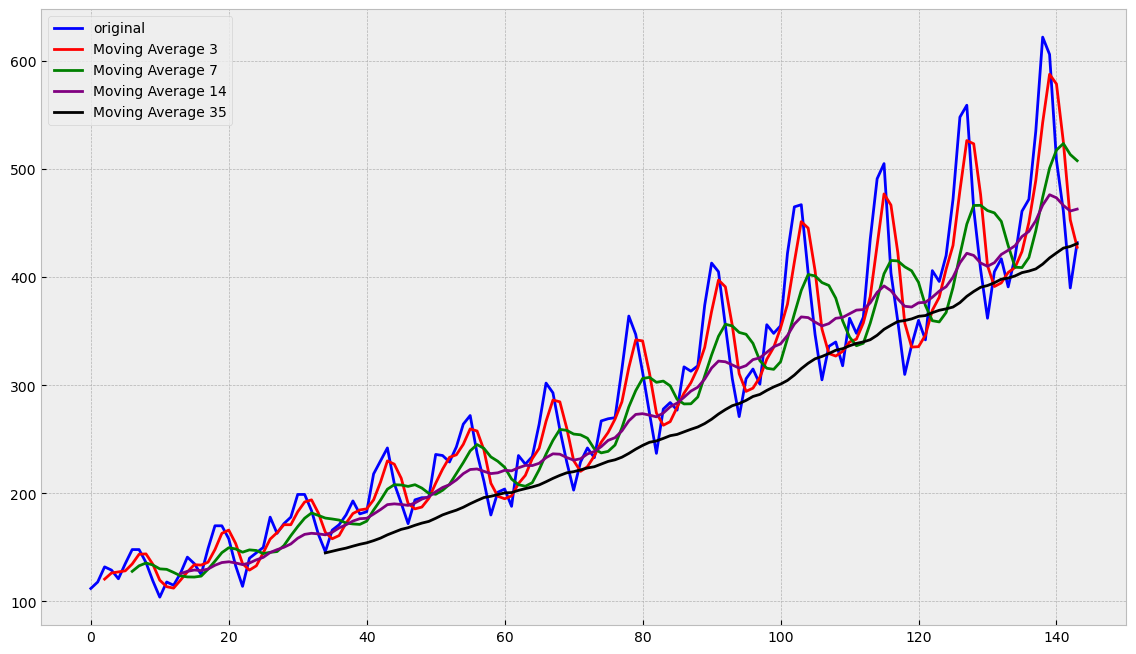

In [11]:
ts = –µairlines_passengers = pd.read_csv("international-airline-passengers.csv")['Count']
nplt = 'Series/international-airline-passengers'

windows = [3,7,14,35]
colors = ['red', 'green', 'purple', 'black']
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(ts, color='blue',label='original')
    for i in range(len(windows)):
        ser = moving_average(ts, windows[i])
        plt.plot(ser, color=colors[i], linewidth='2', label='Moving Average {}'.format(windows[i]))
    plt.legend()

–°–∫–æ–ª—å–∑—è—â–∞—è —Å—Ä–µ–¥–Ω—è—è - –≤—Å–µ–≥–¥–∞ –∑–∞–ø–∞–∑–¥—ã–≤–∞–Ω–∏–µ –æ—Ç –æ—Ä–∏–≥–∏–Ω–∞–ª–∞. –ü—Ä–∏–±–ª–∏–∑–∏—Ç—å –≥—Ä–∞—Ñ–∏–∫ —Å–∫–æ–ª—å–∑—è—â–µ–π –∫ –æ—Ä–∏–≥–∏–Ω–∞–ª—É –±—É–¥–µ–º –ø—Ä–æ–±–æ–≤–∞—Ç—å –Ω–∞ –¥–≤–æ–π–Ω–æ–º –∏ —Ç—Ä–æ–π–Ω–æ–º —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ–º —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏–∏.

# –î–≤–æ–π–Ω–æ–µ —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ–µ —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏–µ

In [12]:
def double_ema(series, alpha, beta):
    result = [series[0]]
    level, trend = series[0], series[1] - series[0]
    for n in range(1, len(series)):
        value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return pd.Series(result)

In [13]:
def plot_dema(alpha, beta):
    dema = double_ema(ts, alpha, beta)
    with plt.style.context('bmh'):
        plt.figure(figsize=(14, 8))
        plt.plot(ts, color='blue',label='original')
        plt.plot(dema, color='red', linewidth='4', label='DEMA')
        plt.title("alpha={}, beta={}".format(alpha, beta))
        plt.legend()

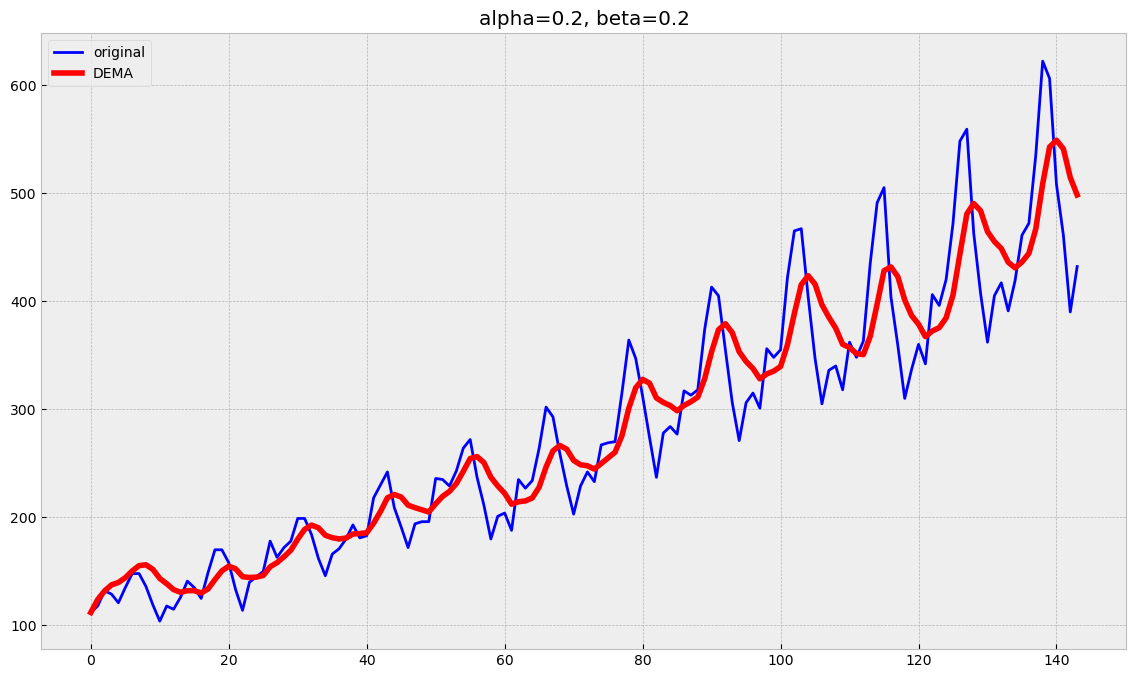

In [14]:
plot_dema(0.2, 0.2)

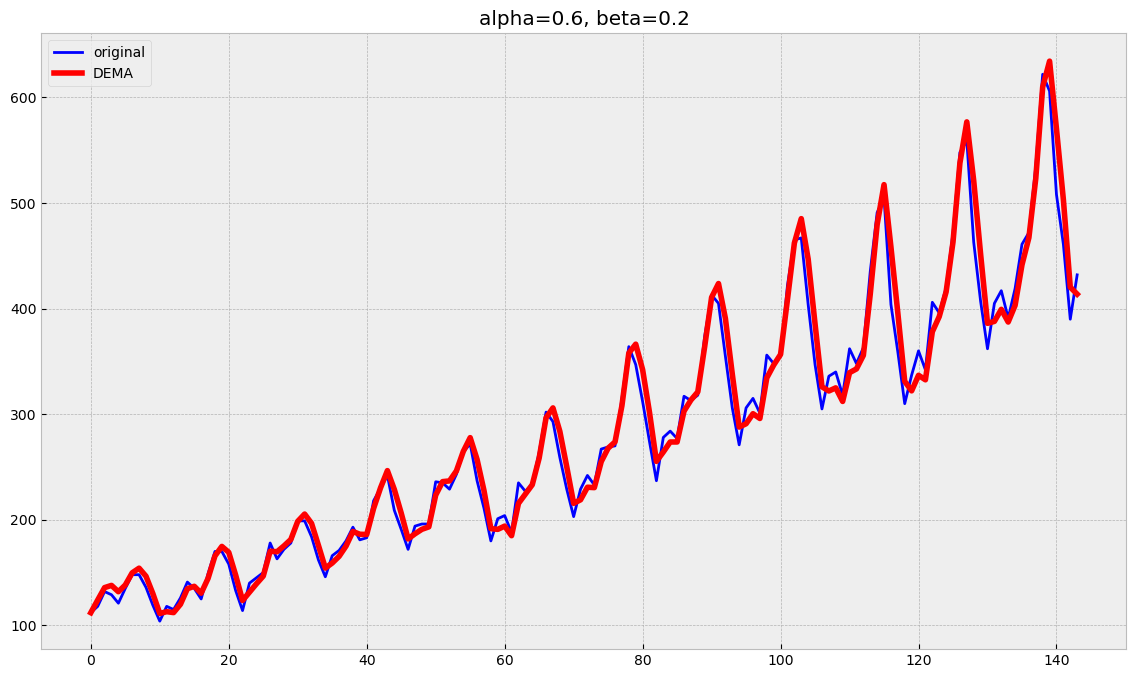

In [15]:
plot_dema(0.6, 0.2)

alpha –æ—Ç–≤–µ—á–∞–µ—Ç –∑–∞ —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏–µ —Ä—è–¥–∞ –≤–æ–∫—Ä—É–≥ —Ç—Ä–µ–Ω–¥–∞, beta - –∑–∞ —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏–µ —Å–∞–º–æ–≥–æ —Ç—Ä–µ–Ω–¥–∞. –ß–µ–º –±–æ–ª—å—à–µ –∑–Ω–∞—á–µ–Ω–∏—è, —Ç–µ–º –±–æ–ª–µ–µ –∑–Ω–∞—á–∏–º—ã–º–∏ –±—É–¥—É—Ç –ø–æ—Å–ª–µ–¥–Ω–∏–µ –Ω–∞–±–ª—é–¥–µ–Ω–∏—è –∏ –º–µ–Ω–µ–µ –∑–Ω–∞—á–∏–º–æ–π –±—É–¥–µ—Ç –∏—Å—Ç–æ—Ä–∏—è.
–î–æ–±–∞–≤–∏–º —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å

# –•–æ–ª—å—Ç-–í–∏–Ω—Ç–µ—Ä—Å

In [16]:
def initial_trend(series, season_len):
    return sum([float(series[i + season_len] - series[i]) / season_len]) / season_len

In [17]:
def initial_seasonal_components(series, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(series)/slen)
    # compute season averages
    for j in range(n_seasons):
        season_averages.append(sum(series[slen*j:slen*j+slen])/float(slen))
    # compute initial values
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += series[slen*j+i]-season_averages[j]
        seasonals[i] = sum_of_vals_over_avg/n_seasons
    return seasonals

In [18]:
def triple_exponential_smoothing(series, slen, alpha, beta, gamma, n_preds):
    result = []
    seasonals = initial_seasonal_components(series, slen)
    for i in range(len(series)+n_preds):
        if i == 0: # initial values
            smooth = series[0]
            trend = initial_trend(series, slen)
            result.append(series[0])
            continue
        if i >= len(series): # we are forecasting
            m = i - len(series) + 1
            result.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = series[i]
            last_smooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
            trend = beta * (smooth-last_smooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
            result.append(smooth+trend+seasonals[i%slen])
    return result

In [19]:
def plot_tema(alpha, beta, gamma, ser=ts, ser_to_plot=ts, n_preds=24):
    tema = triple_exponential_smoothing(ser, 12, alpha, beta, gamma, n_preds)
    with plt.style.context('bmh'):
        plt.figure(figsize=(14, 8))
        plt.plot(ser_to_plot, color='blue',label='original')
        plt.plot(tema, color='red', linewidth='4', label='TEMA')
        plt.title("alpha={}, beta={}, gamma={}".format(alpha, beta, gamma))
        plt.legend()

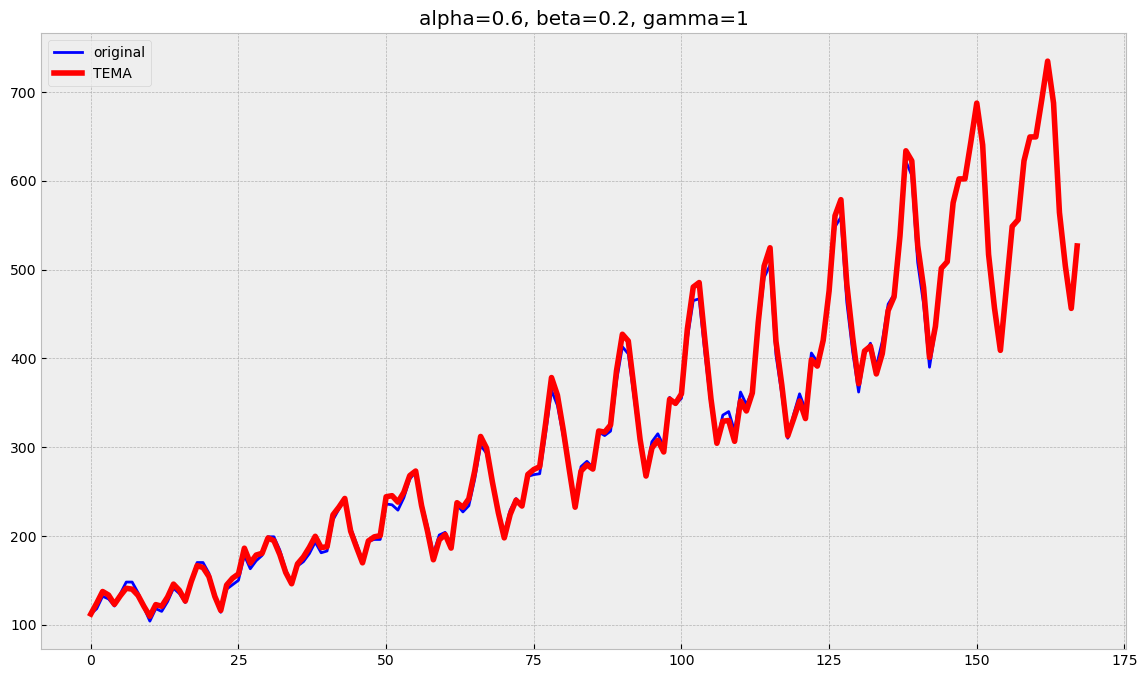

In [20]:
plot_tema(0.6, 0.2, 1)

# –ü–æ–¥–±–æ—Ä –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤

–ß—Ç–æ –∑–Ω–∞—á–∏—Ç, —á—Ç–æ –Ω–∞—à–∞ –º–æ–¥–µ–ª—å –ª—É—á—à–µ –≤—Å–µ–≥–æ –ø—Ä–∏–±–ª–∏–∂–∞–µ—Ç –∏—Å—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ? –≠—Ç–æ –∑–Ω–∞—á–∏—Ç, —á—Ç–æ –º–∏–Ω–∏–º–∏–∑–∏—Ä—É–µ—Ç—Å—è –Ω–µ–∫–æ—Ç–æ—Ä–∞—è —Ñ—É–Ω–∫—Ü–∏—è –æ—à–∏–±–∫–∏. –ú—ã, –¥–ª—è –ø—Ä–æ—Å—Ç–æ—Ç—ã, –±—É–¥–µ—Ç —Å—á–∏—Ç–∞—Ç—å —Å—Ç–∞–Ω–¥–∞—Ä–Ω—Ç—ã–π RMSE:

$RMSE =  \sqrt {1/n \sum^N_{i=1} (\hat{y}_i - y_i)^2}$

–ê–ª–≥–æ—Ä–∏—Ç–º –ø–æ–∏—Å–∫–∞ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–π - –º–µ—Ç–æ–¥ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞. –°—á–∏—Ç–∞–µ–º –ø—Ä–æ–∏–∑–≤–æ–¥–Ω—ã–π –ø–æ –∫–∞–∂–¥–æ–º—É –∏–∑ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –∏ —Å–ø—É—Å–∫–∞–µ–º—Å—è –≤ —Å—Ç–æ—Ä–æ–Ω—É –º–∏–Ω–∏–º—É–º–∞.

In [21]:
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error

In [22]:
series = ts

In [23]:
train, test, val = series[:70], series[70:85], series[85:]

In [24]:
def mse(X):
    alpha, beta, gamma = X
    result = triple_exponential_smoothing(train, 12, alpha, beta, gamma, len(test))
    predictions = result[-len(test):]
    error = mean_squared_error(predictions, test)
    return error

In [25]:
opt = minimize(mse, x0=[0,0,0], method="L-BFGS-B", bounds = ((0, 1), (0, 1), (0, 1)))

In [26]:
alpha_opt, beta_opt, gamma_opt = opt.x
print(opt)

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 67.0871099655068
        x: [ 1.469e-01  3.139e-01  9.564e-01]
      nit: 30
      jac: [ 3.506e-03  1.501e-03  1.165e-04]
     nfev: 152
     njev: 38
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>


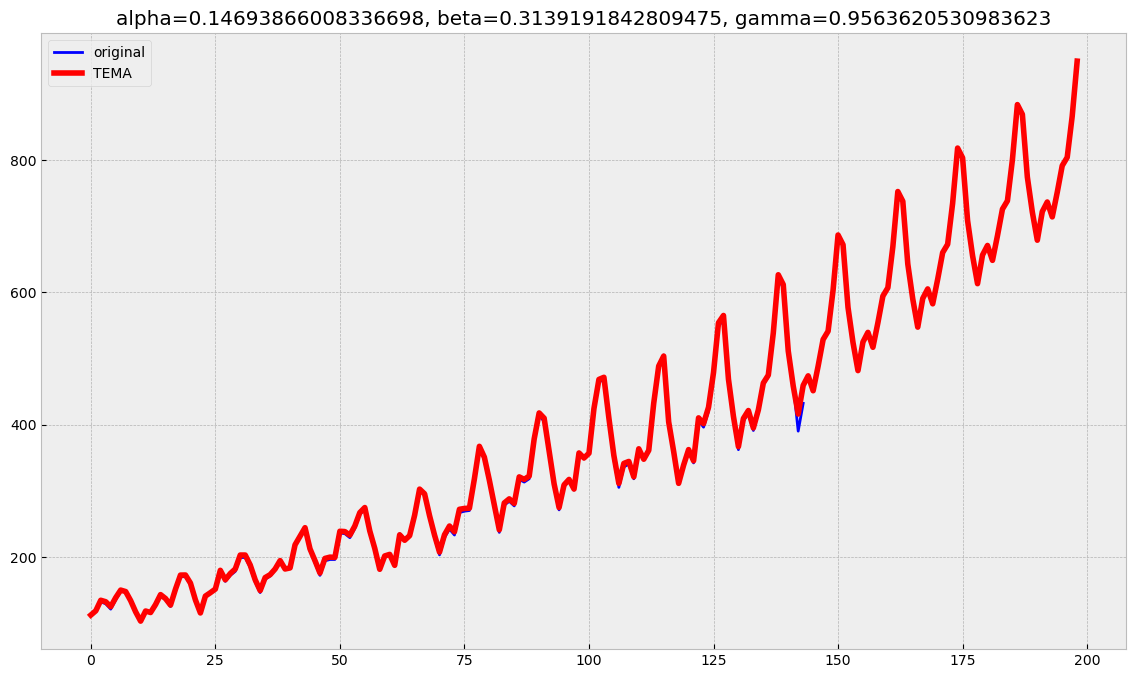

In [27]:
plot_tema(alpha_opt, beta_opt, gamma_opt, ser=series[:140], ser_to_plot=series, n_preds=len(val))

In [28]:
len (val)

59

# –ö—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—è

–ü—Ä–æ–±–ª–µ–º–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏ –Ω–∞ –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö —Ä—è–¥–∞—Ö —Å–æ—Å—Ç–æ–∏—Ç –≤ —Ç–æ–º, —á—Ç–æ —Å–ª—É—á–∞–π–Ω–æ –ø–µ—Ä–µ–º–µ—à–∏–≤–∞—Ç—å –≤ —Ñ–æ–ª–¥–∞—Ö –∑–Ω–∞—á–µ–Ω–∏—è –≤—Å–µ–≥–æ —Ä—è–¥–∞ –Ω–µ–ª—å–∑—è. –¢.–∫. –æ–Ω –∏–º–µ–µ—Ç –≤—Ä–µ–º–µ–Ω–Ω—É—é —Å—Ç—Ä—É–∫—Ç—É—Ä—É, –∏ –µ–µ –Ω–∞–¥–æ —Å–æ—Ö—Ä–∞–Ω—è—Ç—å (–∏–Ω–∞—á–µ –ø–æ—Ç–µ—Ä—è—é—Ç—Å—è –≤—Å–µ –≤–∑–∞–∏–º–æ—Å–≤—è–∑–∏ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π);

–ë—É–¥–µ–º –¥–µ–ª–∞—Ç—å –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—é –Ω–∞ —Å–∫–æ–ª—å–∑—è—â–µ–º –æ–∫–Ω–µ.

–°—É—Ç—å –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –ø—Ä–æ—Å—Ç–∞:
1. –ë–µ—Ä–µ–º t –∏–∑–º–µ—Ä–µ–Ω–∏–π
2. –î–µ–ª–∞–µ–º –ø—Ä–æ–≥–Ω–æ–∑ –Ω–∞ n –∏–∑–º–µ—Ä–µ–Ω–∏–π –≤–ø–µ—Ä–µ–¥ –∏ —Å—á–∏—Ç–∞–µ–º –æ—à–∏–±–∫—É
3. –ë–µ—Ä–µ–º t+n –∏–∑–º–µ—Ä–µ–Ω–∏–π
4. –î–µ–ª–∞–µ–º –ø—Ä–æ–≥–Ω–æ–∑ –Ω–∞ n –∏–∑–º–µ—Ä–µ–Ω–∏–π –≤–ø–µ—Ä–µ–¥ –∏ —Å—á–∏—Ç–∞–µ–º –æ—à–∏–±–∫—É
5. –ë–µ—Ä–µ–º t+2*n –∏–∑–º–µ—Ä–µ–Ω–∏–π
6. –î–µ–ª–∞–µ–º –ø—Ä–æ–≥–Ω–æ–∑ –Ω–∞ n –∏–∑–º–µ—Ä–µ–Ω–∏–π –≤–ø–µ—Ä–µ–¥ –∏ —Å—á–∏—Ç–∞–µ–º –æ—à–∏–±–∫—É
...

In [29]:
train, val = series[:125], series[125:]

In [30]:
from sklearn.model_selection import TimeSeriesSplit

def mse_cross_val(X):
    alpha, beta, gamma = X
    split = TimeSeriesSplit(n_splits=3) 
    errors = []
    
    for train_split, test_split in split.split(train):
        train_split_ts = train.iloc[train_split]
        test_split_ts = train.iloc[test_split]
#         print(train_split_ts)
#         print(test_split_ts)
        result = triple_exponential_smoothing(train_split_ts, 12, alpha, beta, gamma, len(test_split))
        predictions = result[-len(test_split_ts):]
        error = mean_squared_error(predictions, test_split_ts)
        errors.append(error)
    print(f'{np.mean(np.array(errors))}------------')
    return np.mean(np.array(errors))

In [31]:
opt = minimize(mse_cross_val, x0=[0,0,0], method="Nelder-Mead", bounds = ((0, 1), (0, 1), (0, 1)))
# opt = minimize(mse_cross_val, x0=[0,0,0], method="L-BFGS-B", bounds = ((0, 1), (0, 1), (0, 1)))

36159.89293007693------------
35647.77002793573------------
36159.89293007693------------
36116.97329812861------------
35789.029711088195------------
35544.90668862471------------
35243.20946973149------------
35013.617441283706------------
34480.81391818959------------
34467.431191817705------------
33833.96303986028------------
33429.78638286974------------
32397.89693219977------------
31983.972712262563------------
30523.9200795572------------
30156.069074925505------------
28299.423114222198------------
27365.40573871192------------
24830.793654223544------------
24035.48072884156------------
21086.421081931836------------
20121.196456174108------------
16959.774861957296------------
15802.55659208388------------
12760.893928587704------------
11928.185269329793------------
9438.47272575392------------
8713.561724718727------------
6901.253123590562------------
6407.818754941895------------
5230.938030262715------------
4944.964332724267------------
4257.524965263718------------


In [32]:
alpha_opt, beta_opt, gamma_opt = opt.x
print(opt)

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 3141.284449304458
             x: [ 1.113e-01  0.000e+00  1.000e+00]
           nit: 103
          nfev: 194
 final_simplex: (array([[ 1.113e-01,  0.000e+00,  1.000e+00],
                       [ 1.114e-01,  0.000e+00,  1.000e+00],
                       [ 1.113e-01,  0.000e+00,  1.000e+00],
                       [ 1.114e-01,  0.000e+00,  1.000e+00]]), array([ 3.141e+03,  3.141e+03,  3.141e+03,  3.141e+03]))


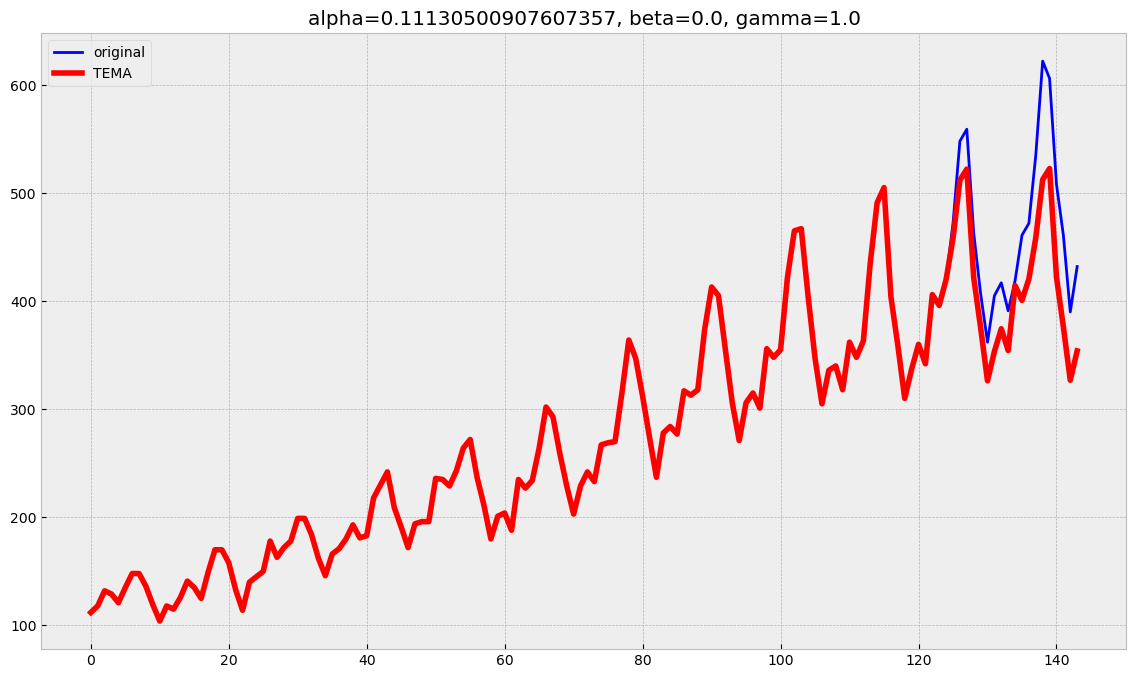

In [33]:
plot_tema(alpha_opt, beta_opt, gamma_opt, ser=train, ser_to_plot=series, n_preds=len(val))

–ø—Ä–∏ –∫—Ä–æ—Å—Å- –≤–∞–ª–∏–¥–∞—Ü–∏–∏ –æ—Å—Ç–∞–ª–∞—Å—å —Å–æ–∑–æ–Ω–Ω–æ—Å—Ç—å–∏ —É—à–µ–ª —Ç—Ä–µ–Ω–¥. –†–µ–∑—É–ª—å—Ç–∞—Ç –ø–æ–¥–±–æ—Ä–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ —Ö—É–∂–µ , —á–µ–º –ø—Ä–∏ –º–∏–Ω–∏–º–∏–∑–∞—Ü–∏–∏ ùëÖùëÄùëÜùê∏